Number of hits: 1585
Ratio of hits 0.7925
Multiplied by 4: 3.17
Area of circle: 12.5664


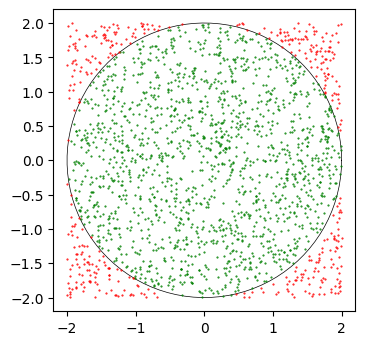

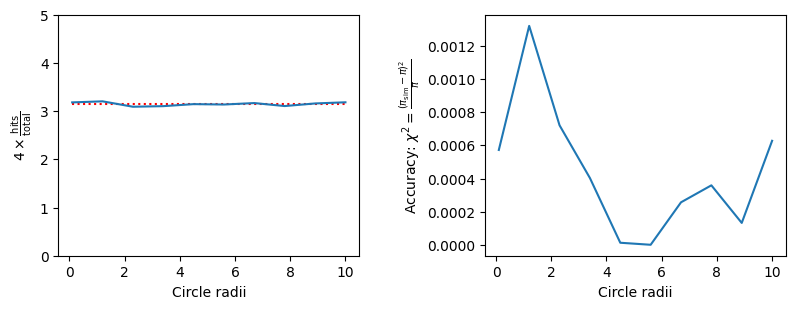

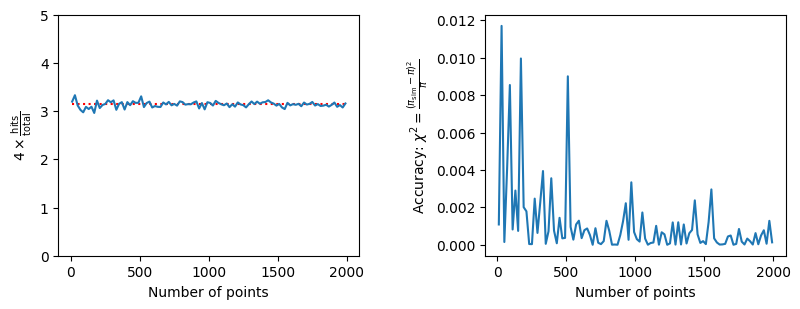

In [40]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np

def simulate_pi(radius,Ncoords,plotyn):
    """
    Function that randomizes points within the square with corners -radius to +radius
    Can also plot points: inside circle as green and red outside
    """

    # Counter for number of hits (inside the circle)
    hitcounter = 0

    # Coordinates of random points
    xcoords = [2*radius*rnd.random()-radius for _ in range(Ncoords)]
    ycoords = [2*radius*rnd.random()-radius for _ in range(Ncoords)]

    if plotyn == "y":
        # Set settings for plots
        fig, ax = plt.figure(dpi=100), plt.axes()
        ax.set_aspect(1)

        # Plot circle and centre point
        ax.plot(radius*np.cos(np.linspace(0,2*np.pi,100)), 
                radius*np.sin(np.linspace(0,2*np.pi,100)),'k',linewidth=0.5)
        ax.plot(0,0,'k')

        # Set colours to each points
        for xcoord, ycoord in zip(xcoords, ycoords):
            
            origdistance = np.sqrt(xcoord**2 + ycoord**2)
            if origdistance <= radius:
                colour = 'g'
                hitcounter += 1
            else:
                colour = 'r'
            
            # Plot
            ax.plot(xcoord, ycoord, '.', markersize=1, color=colour)

        # Give some output!        
        print(f"Number of hits: {hitcounter}")
        print(f"Ratio of hits {hitcounter/Ncoords}")
        print(f"Multiplied by 4: {4*hitcounter/Ncoords}")
        print(f"Area of circle: {np.pi*radius**2:.4f}")

    else:
        # Check if points are inside or outside the circle
        for xcoord, ycoord in zip(xcoords, ycoords):
            origdistance = np.sqrt(xcoord**2 + ycoord**2)
            if origdistance <= radius:
                hitcounter += 1
    
    # Compute approximate pi
    simpi = 4 * hitcounter/Ncoords

    return simpi

# Area of square: (2*r)**2 = 4*r**2
# Area of circle: pi*r**2
# Ratio of areas times four: 4* pi*r**2 / 4*r**2 = pi
# So we get approximations of pi via a monte-carlo simulation.

# Test with one radius ----------
radius = 2

# Number of random points
Ncoords = 2000

# Plot on, run function
plotyn = "y"
simpi1 = simulate_pi(radius,Ncoords,plotyn)

# Test for several radii ----------

# Radius of board
radii = np.linspace(0.1,10,10)

simpi = []
plotyn = "n"
for radius in radii:
    simpi.append(simulate_pi(radius,Ncoords,plotyn))

fig, ax = plt.subplots(1,2, dpi=100, figsize=(8,3))
fig.tight_layout(w_pad=6)

ax[0].set(xlabel="Circle radii", ylabel= r"$4 \times \frac{\rm hits}{\rm total}$", ylim= [0,5])
ax[0].plot([radii[0],radii[-1]], [np.pi,np.pi], 'r:'); # A dotted line for pi
ax[0].plot(radii,simpi); # Results


simpi = np.array(simpi)
ax[1].set(xlabel="Circle radii", ylabel= r"Accuracy: $\chi^2 = \frac{(\pi_{\rm sim} - \pi)^2}{\pi}$")
ax[1].plot(radii,(simpi - np.pi)**2/np.pi);

# Test for several number of points ----------

# Radius of board
radii = 1

# Number of random points
Ncoords = list(range(10,2000,20))

simpi = []
plotyn = "n"
for ncoord in Ncoords:
    simpi.append(simulate_pi(radius,ncoord,plotyn))

fig, ax = plt.subplots(1,2, dpi=100, figsize=(8,3))
fig.tight_layout(w_pad=6)

ax[0].set(xlabel="Number of points", ylabel= r"$4 \times \frac{\rm hits}{\rm total}$", ylim= [0,5])
ax[0].plot([Ncoords[0],Ncoords[-1]], [np.pi,np.pi], 'r:'); # A dotted line for pi
ax[0].plot(Ncoords,simpi); # Results

simpi = np.array(simpi)
ax[1].set(xlabel="Number of points", ylabel= r"Accuracy: $\chi^2 = \frac{(\pi_{\rm sim} - \pi)^2}{\pi}$")
ax[1].plot(Ncoords,(simpi - np.pi)**2/np.pi);



In [39]:
len(list(range(10,2000,20)))



100